In [1]:
import warnings
warnings.filterwarnings('ignore')

from honest_ml.trainer import (
    RegressionTrainer, ClassificationTrainer, 
    EvaluateModel, EvaluateModelAndHyperParameters
)
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

clf = LogisticRegression()
X, y = make_classification(
    n_samples=100,  n_features=10,
    n_informative=9, n_redundant=1,
    random_state=0
)
X = pd.DataFrame(X)
y = pd.Series(y)
num_trials = 100
hyperparameters = {
    "C": {
        "range": (1e-3, 2),
        "type": "float",
    },
    "tol": {
        "range": (1e-3, 2),
        "type": "float"
    },
    "max_iter": {
        "range": (100, 1000),
        "type": "int"
    }
}
clf_eval = EvaluateModelAndHyperParameters(
    "classification", 
    clf, X, y, num_trials,
    hyperparameters,
    sufficient_compute=True
)
model_instances = clf_eval.fit_random("random")

1
{'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


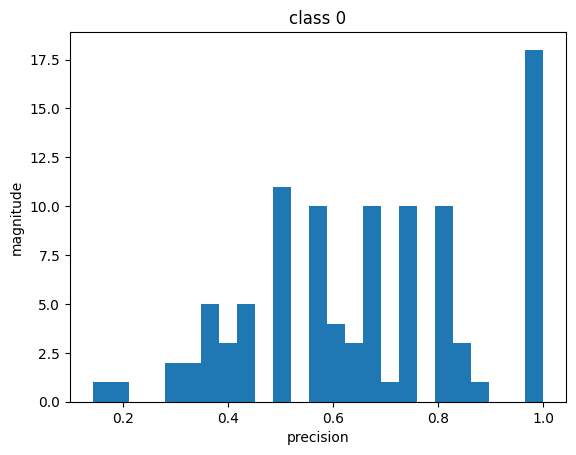

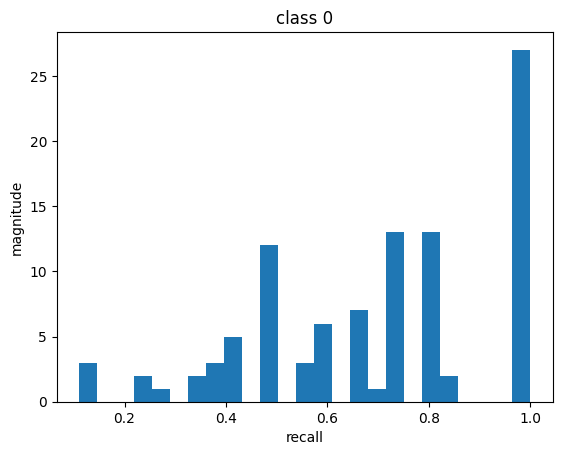

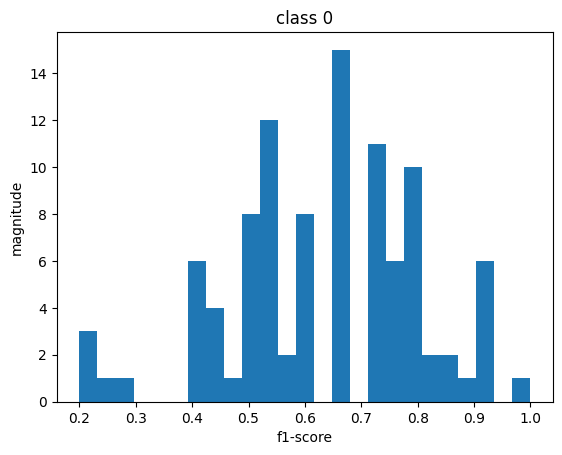

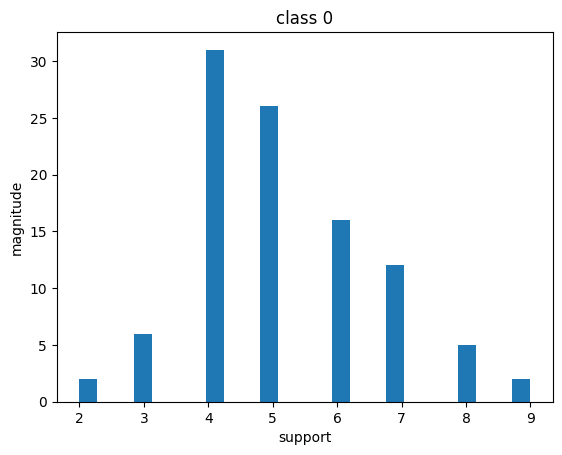

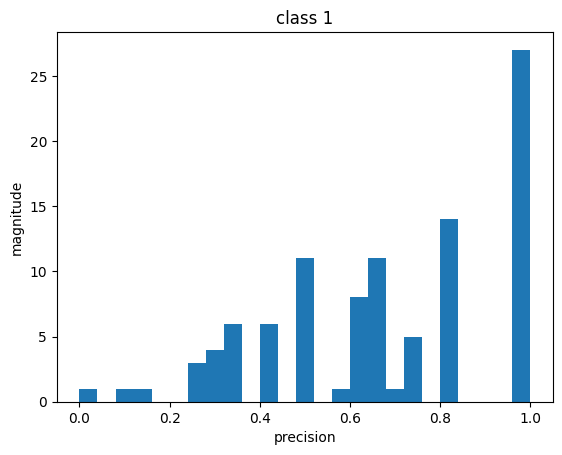

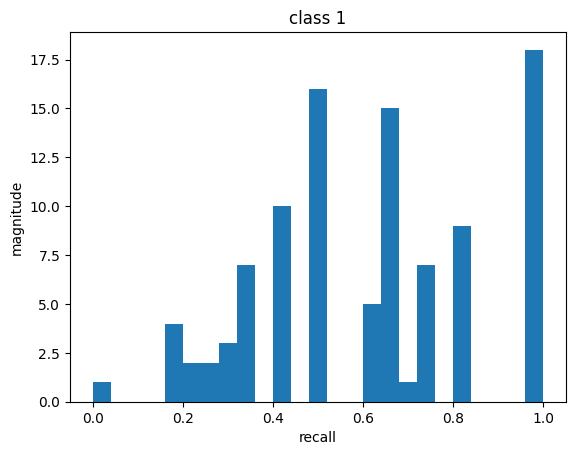

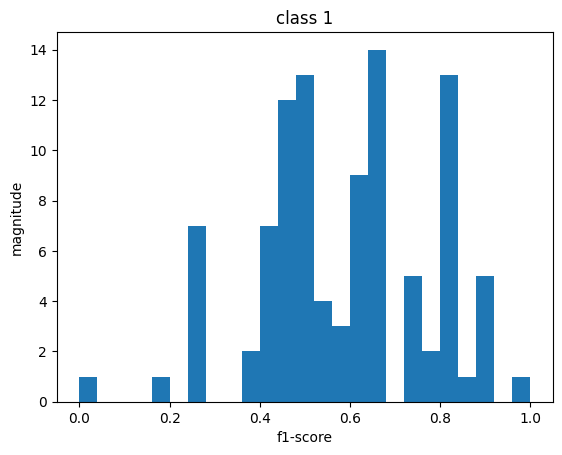

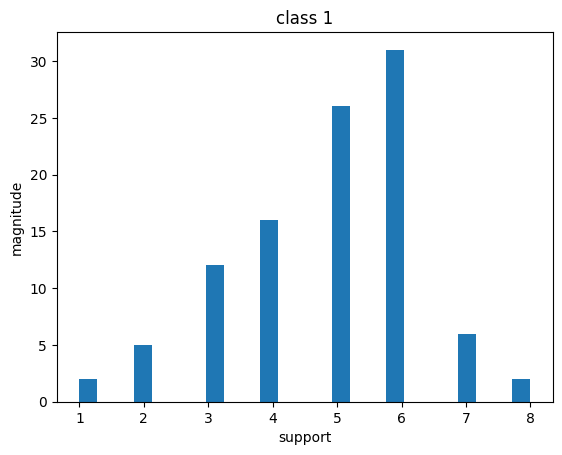

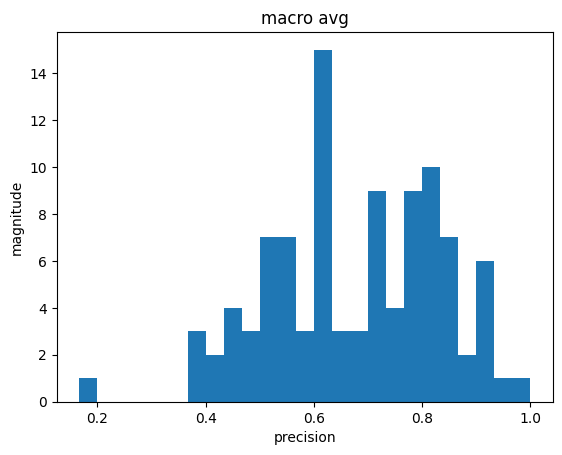

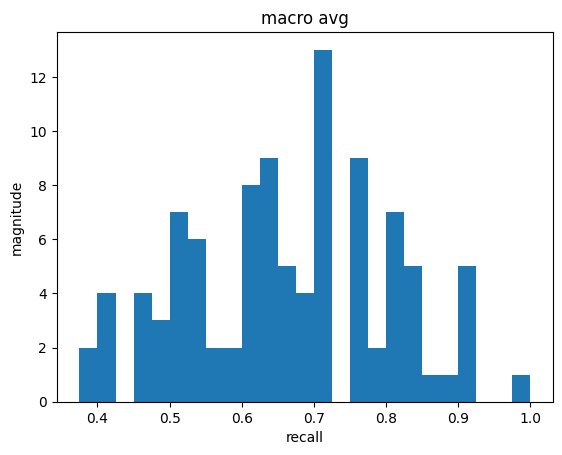

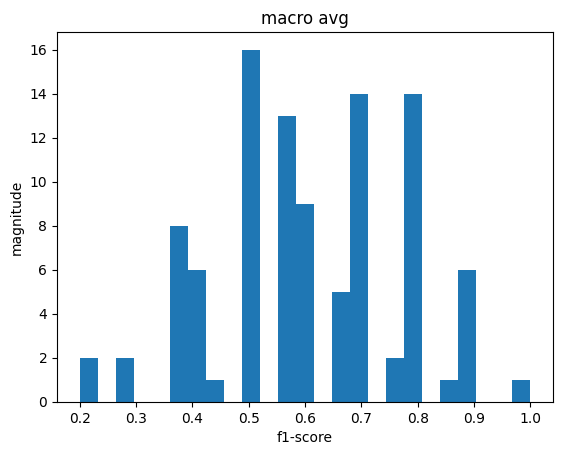

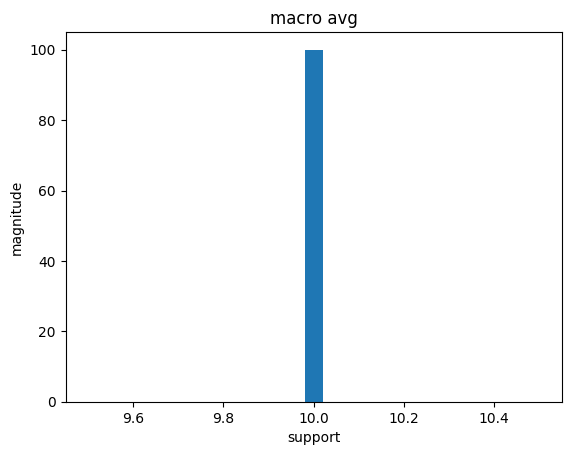

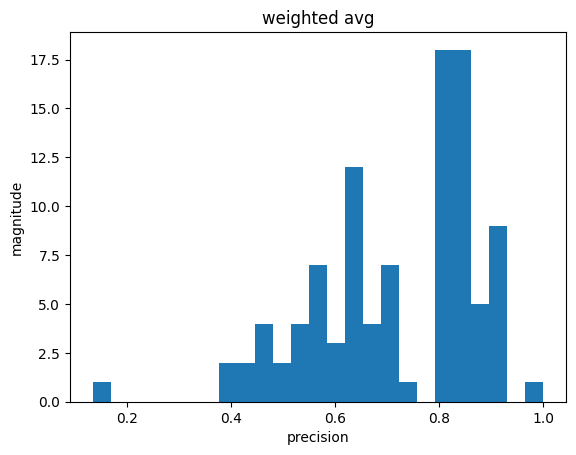

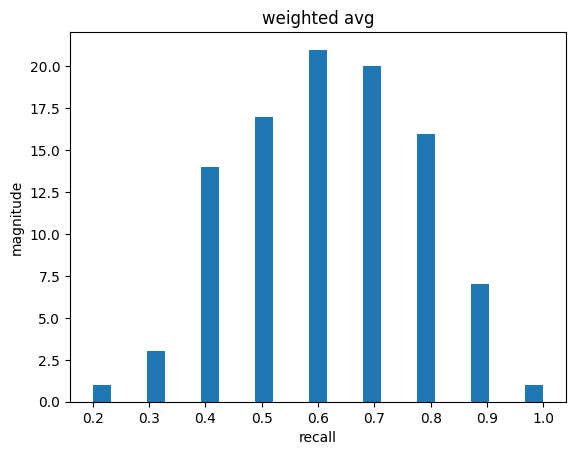

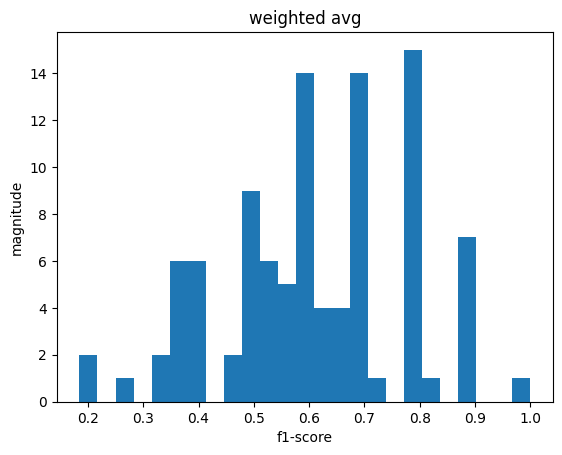

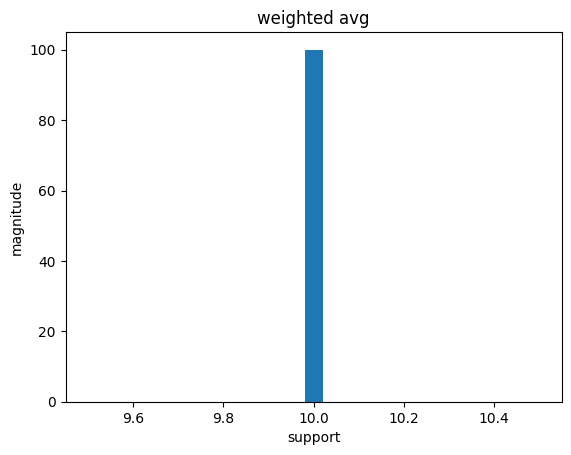

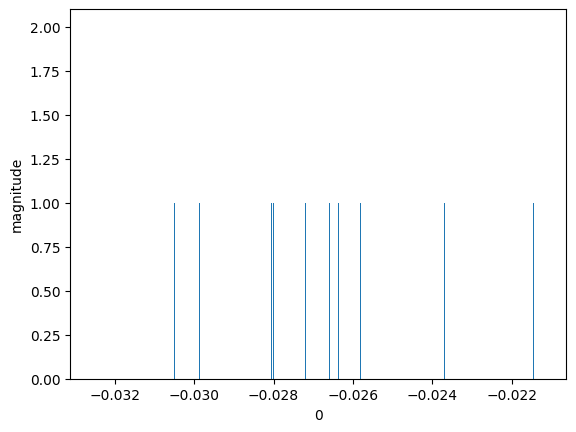

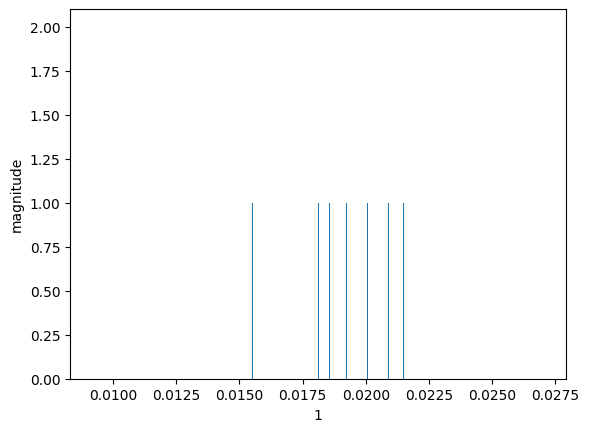

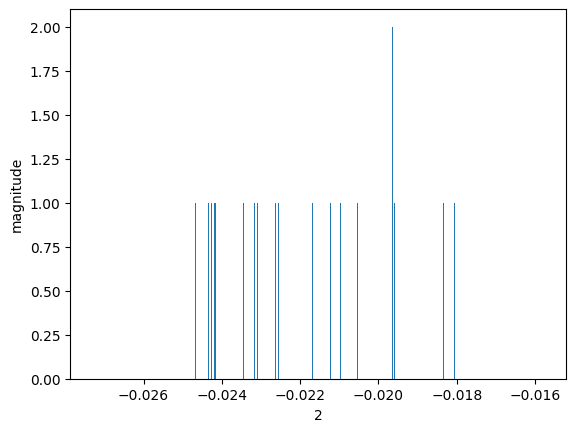

In [ ]:
from honest_ml.visualizer import Visualizer

hp_sets = list(set([m["hyperparameter_set"] for m in model_instances]))
hp_collections = {}
for hp_set in hp_sets:
    hp_collections[hp_set] = [m for m in model_instances if hp_set == m["hyperparameter_set"]]
       
for hp_set in hp_collections:
    print(f"{hp_set}")
    _model_instances = hp_collections[hp_set]
    print(_model_instances[0]["hyperparameters"])
    viz = Visualizer(_model_instances, "classification", coef_names=X.columns.tolist())
    viz.visualize_classification(bins=len(_model_instances)//4)
    viz.visualize_coeficients(bins=len(model_instances))

In [ ]:
from honest_ml.trainer import AnalyzeClassificationMeasures

analyzer = AnalyzeClassificationMeasures()
analyzer.fit(model_instances, X, y)
coarse_res = analyzer.coarse_grained_analysis()
fine_res = analyzer.fine_grained_analysis()

In [ ]:
model_instances[0]